In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
# Le dataset est fourni en pièce jointe ou local : supermarket_sales.csv
df = pd.read_csv('data/supermarket_sales.csv')

# Aperçu
print(df.shape)

(1000, 17)


In [3]:

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
print(df.describe())

In [6]:
# Conversion des types
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax                        0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
GrossIncome                0
Rating                     0
Month                      0
Day                        0
Hour                       0
DayOfWeek                  0
dtype: int64
        Unit price     Quantity          Tax        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,...,Month,Day,Hour,DayOfWeek,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1,5,13,Saturday,0,2,0,0,3,2
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,3,8,10,Friday,2,1,1,0,0,0
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,3,3,13,Sunday,0,2,1,0,4,1
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,1,27,20,Sunday,0,2,0,0,3,2
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,2,8,10,Friday,0,2,0,0,5,2


In [7]:

# Extraction de features temporelles
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()


In [8]:

# Renommage pour plus de clarté (Sales = Total des ventes)
df.rename(columns={'Sales': 'Total', 'Tax 5%': 'Tax', 'gross income': 'GrossIncome'}, inplace=True)



In [11]:
# Vérification des valeurs manquantes et outliers
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax                        0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
GrossIncome                0
Rating                     0
Month                      0
Day                        0
Hour                       0
DayOfWeek                  0
Branch_encoded             0
City_encoded               0
Customer type_encoded      0
Gender_encoded             0
Product line_encoded       0
Payment_encoded            0
dtype: int64


In [10]:
df.describe()

,Unit price,Quantity,Tax,Total,Date,cogs,gross margin percentage,GrossIncome,Rating,Month,Day,Hour,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270,1.993000,15.256000,14.910000,0.988000,1.008000,0.435000,0.429000,2.452000,1.001000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000,1.000000,8.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000,2.000000,15.000000,15.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000,3.000000,23.000000,18.000000,2.000000,2.000000,1.000000,1.000000,4.000000,2.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000,3.000000,31.000000,20.000000,2.000000,2.000000,1.000000,1.000000,5.000000,2.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,0.835254,8.693563,3.186857,0.817633,0.820127,0.496005,0.495181,1.715412,0.830475


In [12]:
# Encodage des variables catégorielles
cat_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
le_dict = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    le_dict[col] = le



In [13]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax,Total,...,Month,Day,Hour,DayOfWeek,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Payment_encoded
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,1,5,13,Saturday,0,2,0,0,3,2
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,3,8,10,Friday,2,1,1,0,0,0
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,3,3,13,Sunday,0,2,1,0,4,1
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,1,27,20,Sunday,0,2,0,0,3,2
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,2,8,10,Friday,0,2,0,0,5,2


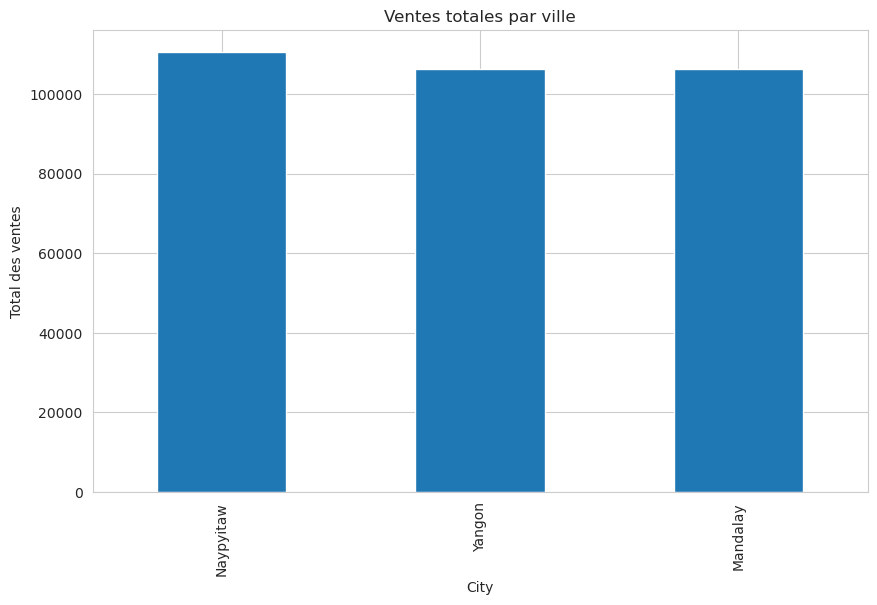

In [14]:
# Ventes totales par ville
plt.figure(figsize=(10,6))
df.groupby('City')['Total'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ventes totales par ville')
plt.ylabel('Total des ventes')
plt.show()

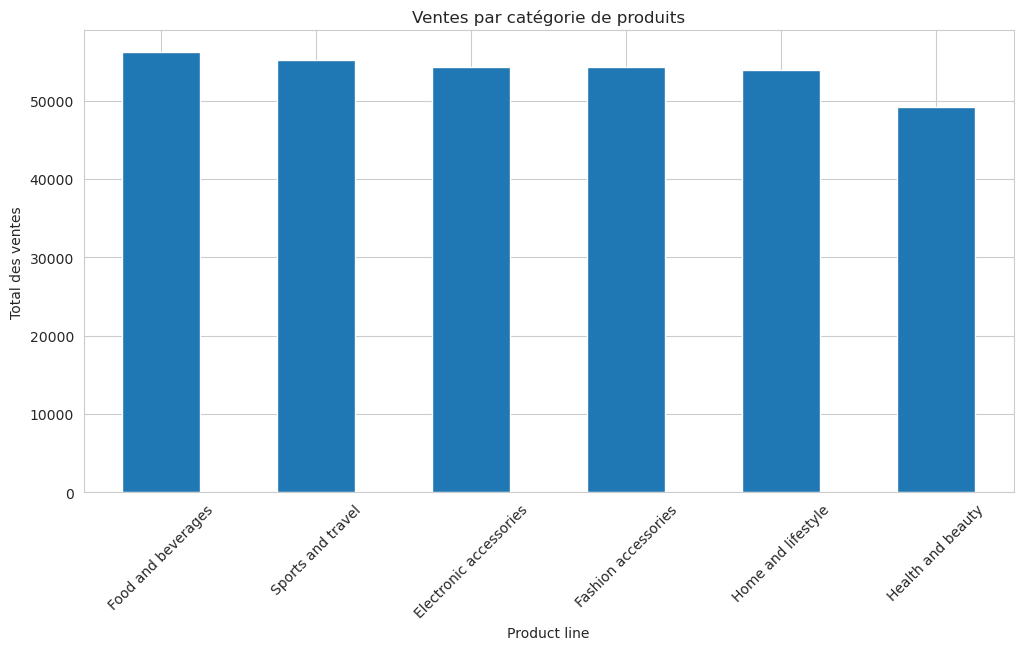

In [15]:
# Catégories de produits les plus populaires
plt.figure(figsize=(12,6))
df.groupby('Product line')['Total'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ventes par catégorie de produits')
plt.ylabel('Total des ventes')
plt.xticks(rotation=45)
plt.show()

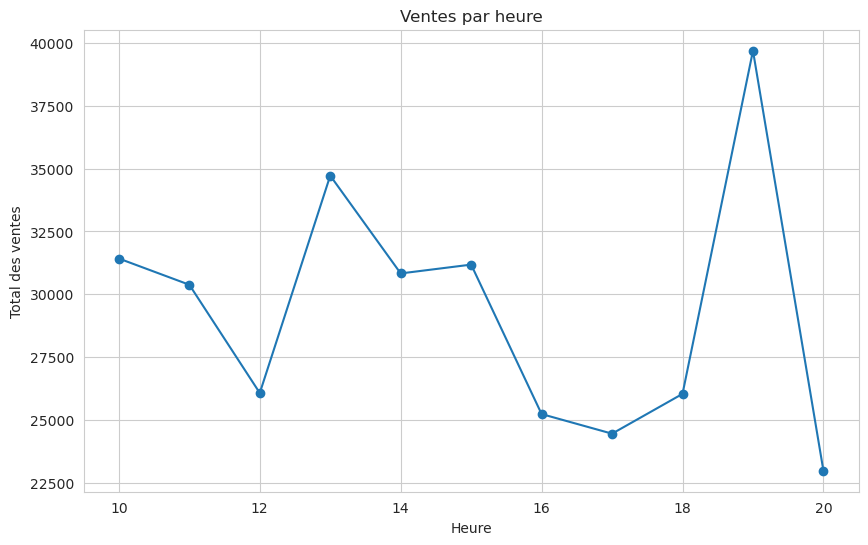

In [16]:
# Ventes par heure de la journée
plt.figure(figsize=(10,6))
df.groupby('Hour')['Total'].sum().plot(kind='line', marker='o')
plt.title('Ventes par heure')
plt.xlabel('Heure')
plt.ylabel('Total des ventes')
plt.show()

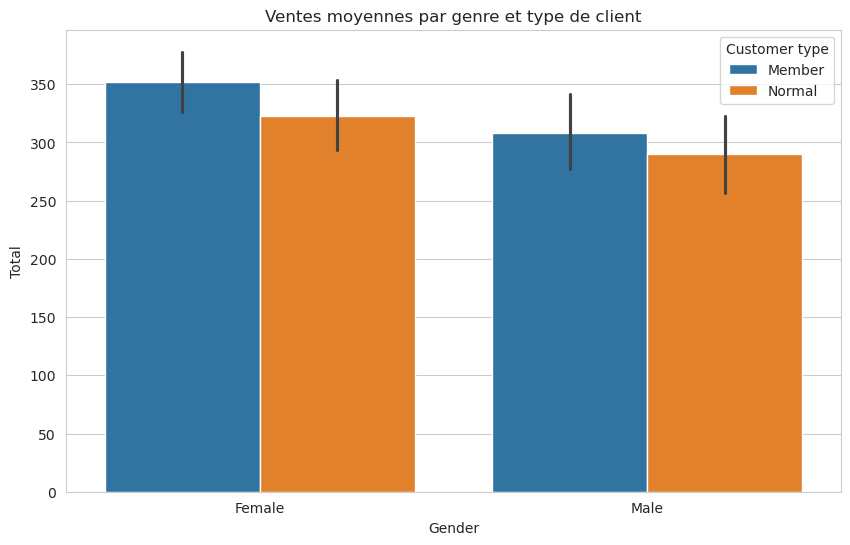

In [17]:
# Comparaison Genre / Type de client
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Total', hue='Customer type', data=df)
plt.title('Ventes moyennes par genre et type de client')
plt.show()

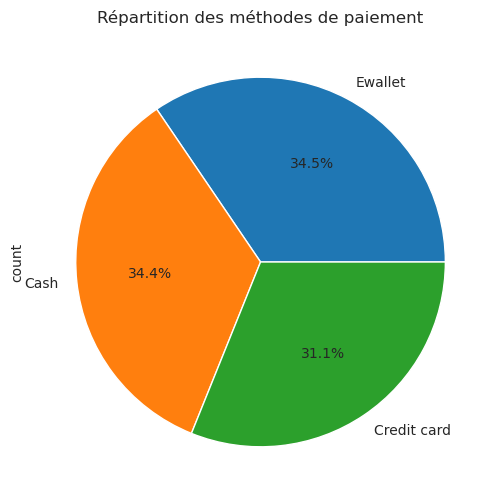

In [18]:
# Méthodes de paiement
plt.figure(figsize=(8,6))
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des méthodes de paiement')
plt.show()

In [19]:
# Features sélectionnées
features = ['Branch_encoded', 'City_encoded', 'Customer type_encoded', 'Gender_encoded',
            'Product line_encoded', 'Payment_encoded', 'Unit price', 'Quantity', 
            'Month', 'Hour', 'Tax']

X = df[features]
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle RandomForest (très performant ici car Total ≈ Quantity * Unit price * 1.05)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Métriques
print('MAE :', mean_absolute_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R² :', r2_score(y_test, y_pred))

MAE : 0.870198262499984
RMSE : 1.4761621377812402
R² : 0.9999665064872701


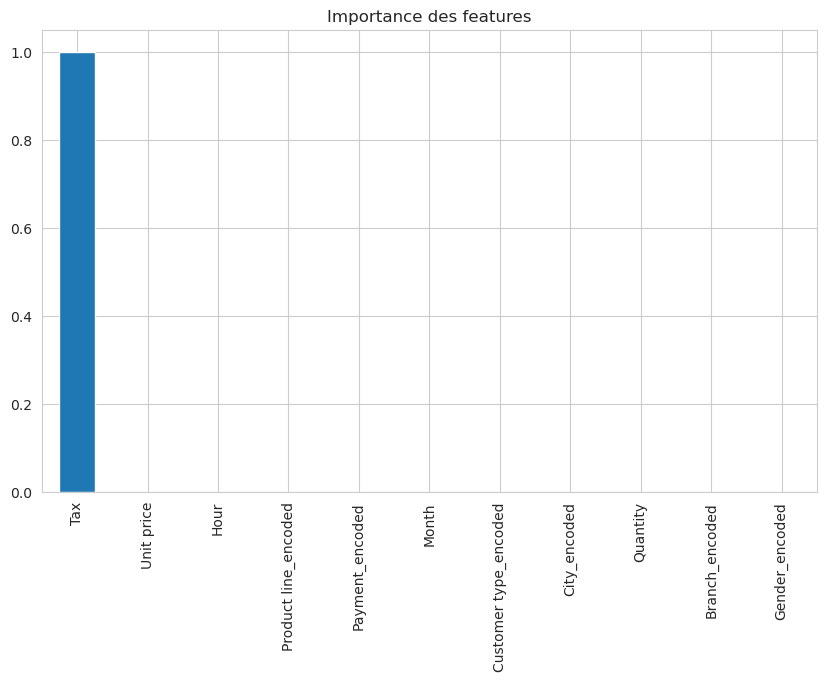

In [20]:
# Importance des features
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title('Importance des features')
plt.show()

In [21]:
joblib.dump(model, 'supermarket_sales_model.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')
print("Modèle et encodeurs sauvegardés !")

Modèle et encodeurs sauvegardés !
